### Disclaimer: 
Please note that due to shuffling in an earlier stage, the accuracy rates may vary slightly from those presented in our initial presentation and our main complete codebase. We have taken steps to minimize such discrepancies in the future. We apologize for any inconsistencies.

### Importing libraries and datasets

In [ ]:
# For data processing
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
sb.set(style='whitegrid')

X_train = pd.read_csv('2X1_train.csv')
X_test.to_csv('2X1_test.csv')
X2_train.to_csv('2X2_train.csv', index=False)
X2_test.to_csv('2X2_test.csv', index=False)
X3_train.to_csv('2X3_train.csv', index=False)
X3_test.to_csv('2X3_test.csv', index=False)
X4_train.to_csv('2X4_train.csv', index=False)
X4_test.to_csv('2X4_test.csv', index=False)

## Part 5: Random Forest Classifier

In order to improve our accuracy, we extended our research and implemented Random Forest Classification. Unlike a single decision tree, random forest reduces the risk of overfitting by averaging results from many trees. Hence, it helped us a lot.

### 5.1 A model trained on __X_train__ set 

In [862]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.utils import column_or_1d

In [863]:
rf = RandomForestClassifier()

y_train = column_or_1d(y_train)
y_test = column_or_1d(y_test)

# Fit the Random Forest model
rf.fit(X_train, y_train)

RandomForestClassifier()

In [864]:
y_pred = rf.predict(X_test)
score = rf.score(X_test, y_test)
print("Accuracy score for this X_train set:", score)

Accuracy score for this X_train set: 0.6875


### Further Evaluation Metrics

In [866]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.81      0.76      0.78        71
         Yes       0.41      0.48      0.44        25

    accuracy                           0.69        96
   macro avg       0.61      0.62      0.61        96
weighted avg       0.70      0.69      0.69        96



In [868]:
features = pd.DataFrame(rf.feature_importances_, index = X.columns)

In [869]:
features.head(5)

,0
Age,0.807521
Gender,0.168255
Smoking History,0.024224


From here, we can conclude that Age was the biggest factor when predicting cancer occurence for this model.

### 5.2 A model trained on __X2_train__ set 

In [873]:
rf = RandomForestClassifier()

y2_train = column_or_1d(y2_train)
y2_test = column_or_1d(y2_test)

# Fit the Random Forest model
rf.fit(X2_train, y2_train)

RandomForestClassifier()

In [874]:
y2_pred = rf.predict(X2_test)
score = rf.score(X2_test, y2_test)
print("Accuracy score for this X2_train set:", score)

Accuracy score for this X2_train set: 0.7916666666666666


### Further Evaluation Metrics

In [875]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

          No       0.86      0.84      0.85        68
         Yes       0.63      0.68      0.66        28

    accuracy                           0.79        96
   macro avg       0.75      0.76      0.75        96
weighted avg       0.80      0.79      0.79        96



In [876]:
features2 = pd.DataFrame(rf.feature_importances_, index = X2.columns)
features2.head()

,0
Age,0.370712
Gender,0.085806
Currently Smoking,0.069959
Smoking History,0.017622
Adenopathy,0.455901


### 5.3 A model trained on __X3_train__ set 

In [878]:
rf = RandomForestClassifier()

y3_train = column_or_1d(y3_train)
y3_test = column_or_1d(y3_test)
rf.fit(X3_train, y3_train)

RandomForestClassifier()

In [879]:
y3_pred = rf.predict(X3_test)
score = rf.score(X3_test, y3_test)
print("Accuracy score for this X3_train set:", score)

Accuracy score for this X3_train set: 0.9270833333333334


### Further Evaluation Metrics

In [880]:
print(classification_report(y3_test, y3_pred))

              precision    recall  f1-score   support

          No       0.94      0.96      0.95        69
         Yes       0.88      0.85      0.87        27

    accuracy                           0.93        96
   macro avg       0.91      0.90      0.91        96
weighted avg       0.93      0.93      0.93        96



In [ ]:
# Importace score

features3 = pd.DataFrame(rf.feature_importances_, index = X3.columns)
features3.head(10)

### 5.4 A model trained on __X4_train__ set 

In [883]:
y4_train = column_or_1d(y4_train)
y4_test = column_or_1d(y4_test)
rf.fit(X4_train, y4_train)

RandomForestClassifier()

In [885]:
y4_pred = rf.predict(X4_test)
score = rf.score(X4_test, y4_test)
print("Accuracy score for this X4_train set:", score)

Accuracy score for this X4_train set: 0.9895833333333334


### Further Evaluation Metrics

In [886]:
print(classification_report(y4_test, y4_pred))

              precision    recall  f1-score   support

          No       0.99      1.00      0.99        69
         Yes       1.00      0.96      0.98        27

    accuracy                           0.99        96
   macro avg       0.99      0.98      0.99        96
weighted avg       0.99      0.99      0.99        96



In [887]:
features4 = pd.DataFrame(rf.feature_importances_, index = X4.columns)
features4.head(20)

,0
Age,0.066331
Gender,0.015230
Currently Smoking,0.006091
Smoking History,0.003511
Radiotherapy History,0.000202
Thyroid Function,0.013831
Physical Examination,0.019806
Adenopathy,0.087626
Types of Thyroid Cancer (Pathology),0.013990
Focality,0.016518


#### NOTE:
One of the strengths of Random Forest is its ability to __rank feature importance__. According to our model, the three most critical predictors of cancer recurrence risk were: 
- Response to initial treatment </br>
- Adenopathy</br>
- Overall assessed risk</br>

Together, these variables accounted for roughly __80%__ of the model’s predictive power.

So far, our __best model__ is Random Forest Classification trained on X4 model with accuracy of __98%.__

## Part 6: Introducing Hyper parameters to increase the accuracy 
We further optimized the Random Forest model using __hyperparameter tuning__, which improved the highest accuracy we achieved so far from __97% to 98%__.

Still, our team felt that in a medical context—even a __1% margin of error__ could be critical, __meaning life or death__. So we continued exploring ways to further boost performance.

#### 6.1 A Model Trained on __X_train__ set 

In [891]:
rf2 = RandomForestClassifier(n_estimators = 1000,
                             criterion = "entropy",
                             min_samples_split = 10,
                             max_depth = 14,
                             random_state = 42
)

In [892]:
rf2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_split=10,
                       n_estimators=1000, random_state=42)

In [894]:
rf2.score(X_test, y_test)

0.6875

In [895]:
y_pred = rf2.predict(X_test)

In [896]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.80      0.77      0.79        71
         Yes       0.41      0.44      0.42        25

    accuracy                           0.69        96
   macro avg       0.60      0.61      0.60        96
weighted avg       0.70      0.69      0.69        96



#### 6.2 A Model Trained on __X2_train__ set

In [898]:
rf2.fit(X2_train, y2_train)

RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_split=10,
                       n_estimators=1000, random_state=42)

In [899]:
score = rf2.score(X2_test, y2_test)
print("Accuracy score for this module: ", score)

Accuracy score for this module:  0.78125


In [900]:
y2_pred = rf2.predict(X2_test)
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

          No       0.85      0.84      0.84        68
         Yes       0.62      0.64      0.63        28

    accuracy                           0.78        96
   macro avg       0.74      0.74      0.74        96
weighted avg       0.78      0.78      0.78        96



#### 6.3 A Model Trained on __3_train__ set

In [903]:
rf2.fit(X3_train, y3_train)

RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_split=10,
                       n_estimators=1000, random_state=42)

In [904]:
score = rf2.score(X3_test, y3_test)
print("Accuracy score for this module: ", score)

Accuracy score for this module:  0.9583333333333334


In [905]:
y3_pred = rf2.predict(X3_test)
print(classification_report(y3_test, y3_pred))

              precision    recall  f1-score   support

          No       0.96      0.99      0.97        69
         Yes       0.96      0.89      0.92        27

    accuracy                           0.96        96
   macro avg       0.96      0.94      0.95        96
weighted avg       0.96      0.96      0.96        96



#### 6.4 A Model Trained on __X4_train__ set

In [907]:
rf2.fit(X4_train, y4_train)

RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_split=10,
                       n_estimators=1000, random_state=42)

In [908]:
score = rf2.score(X4_test, y4_test)
print("Accuracy score for this module: ", score)

Accuracy score for this module:  0.9895833333333334


In [911]:
y4_pred = rf2.predict(X4_test)
print(classification_report(y4_test, y4_pred))

              precision    recall  f1-score   support

          No       0.99      1.00      0.99        69
         Yes       1.00      0.96      0.98        27

    accuracy                           0.99        96
   macro avg       0.99      0.98      0.99        96
weighted avg       0.99      0.99      0.99        96



## Part 7:  K-Means Clustering and Overall Best Model 

Our third approach involved __K-Means Clustering__, not as a standalone classifier, but as a __tool__ to enrich our predictive model.

We first determined the optimal number of clusters using various plots, including the k-means inertia plot, and identified three distinct clusters. These clusters showed good separation and high density, suggesting strong internal cohesion.

Based on this insight, we decided to use the cluster assignment as an additional feature in our best-performing model—the Random Forest. We trained this on both X3 and X4 datasets, as they were interchangebly well in terms of predictor variables.

This integration resulted in a further performance boost, increasing our accuracy by about 2%, from __98% to 100%__.

In [913]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [914]:
X_cluster = thyroiddata_filtered.drop(columns=['Recurred'])

In [915]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

#### 7.1 Determining the optimal number of clusters

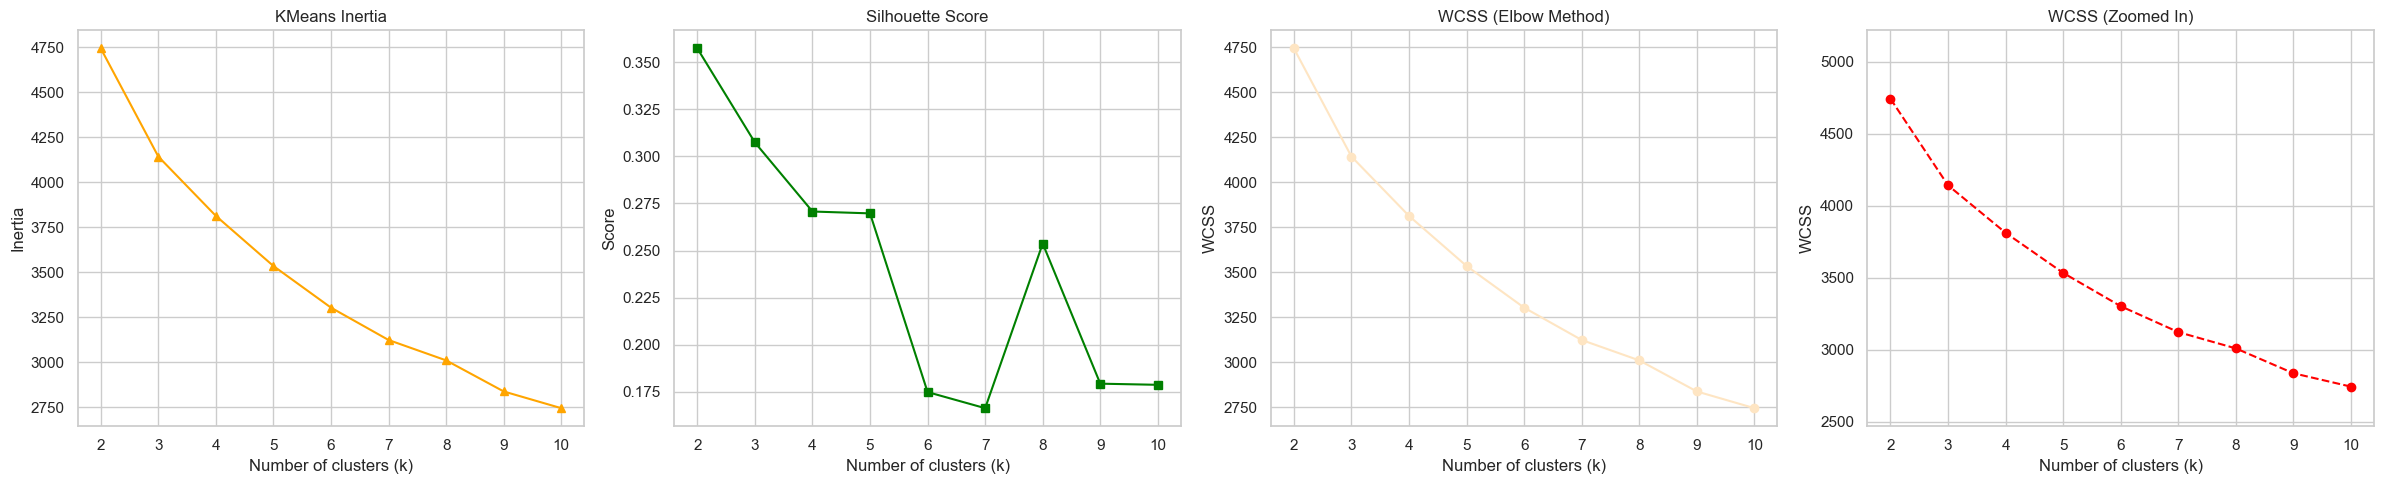

In [917]:
wcss = []                # Within-Cluster Sum of Squares
silhouette_scores = []  # Silhouette Score
inertias = []            # KMeans inertia
k_values = range(2, 11)


for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    
    wcss.append(kmeans.inertia_)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plotting 4 graphs next to each other
fig, axs = plt.subplots(1, 4, figsize=(24, 5))

# 1. WCSS (same as inertia)
axs[2].plot(k_values, wcss, marker='o')
axs[2].set_title('WCSS (Elbow Method)')
axs[2].set_xlabel('Number of clusters (k)')
axs[2].set_ylabel('WCSS')

# 2. Silhouette Score
axs[1].plot(k_values, silhouette_scores, marker='s', color='green')
axs[1].set_title('Silhouette Score')
axs[1].set_xlabel('Number of clusters (k)')
axs[1].set_ylabel('Score')

# 3. Inertia
axs[0].plot(k_values, inertias, marker='^', color='orange')
axs[0].set_title('KMeans Inertia')
axs[0].set_xlabel('Number of clusters (k)')
axs[0].set_ylabel('Inertia')

# 4. WCSS with zoom (focus on curve detail)
axs[3].plot(k_values, wcss, marker='o', linestyle='--', color='red')
axs[3].set_ylim(min(wcss)*0.9, max(wcss)*1.1)
axs[3].set_title('WCSS (Zoomed In)')
axs[3].set_xlabel('Number of clusters (k)')
axs[3].set_ylabel('WCSS')

plt.tight_layout()
plt.show()


To determine the optimal number of clusters (k) for K-Means, we analyzed four evaluation plots: WCSS (Elbow Method), Silhouette Score, KMeans Inertia, and a Zoomed-In WCSS plot.

1. __KMeans Inertia__
Inertia drops sharply up to k = 3 and begins to flatten afterward, suggesting elbow method's finding that three clusters capture the most meaningful structure without overfitting.

2. __Silhouette Score__
Silhouette scores, which measure how well points fit within their clusters (higher is better), peak at k = 2 and remain relatively high at k = 3, before dropping significantly from k = 4 onward. This suggests clusters become less well-separated beyond k = 3.

3. __Elbow Method (WCSS)__
The plot shows a sharp decline in within-cluster sum of squares (WCSS) as k increases from 2 to 3, with the curve flattening beyond k = 3. This "elbow" indicates diminishing returns in clustering quality with more clusters.

4. __Zoomed-In WCSS__
The zoomed view further highlights the subtle flattening after k = 3–4, supporting that adding more clusters beyond this point yields only marginal gains.

Based on the elbow point in WCSS, the highest silhouette score, and the leveling of inertia, we chose __k = 3__ as the __most appropriate__ one. This balances good cluster separation with model simplicity and avoids over-partitioning the dataset.



In [919]:
optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k)
X4['Cluster'] = kmeans_final.fit_predict(X_scaled)

#### 7.2 Illustration of the Clusters

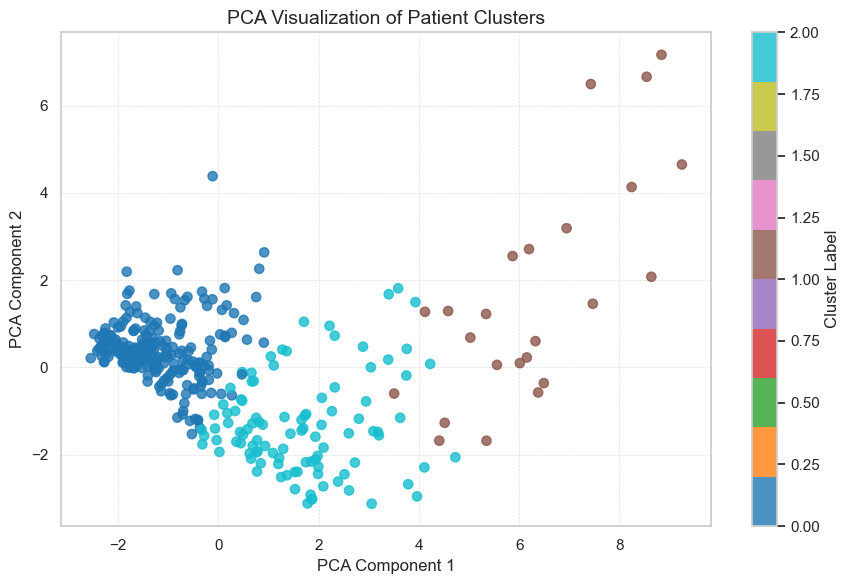

In [920]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2 for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the PCA projection with clusters
plt.figure(figsize=(9, 6))
plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=X4['Cluster'],
    cmap='tab10',
    s=45,
    alpha=0.8
)
plt.title('PCA Visualization of Patient Clusters', fontsize=14)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.colorbar(label='Cluster Label')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.show()


Insights from the graph:
1. __Cluster Separation (Minimal Overlap)__ The clusters show clear separation with almost no overlap. The model effectively distinguishes patient subgroups based on recurrence risk
2. __Cluster Density__ We can see that the _green_ and _brown_ clusters are densely packed. This could imply that patients within these clusters share highly similar profiles.
3. __Outliers__ There are a few patients lie far from their expected clusters. This may represent very rare/unique cases and potential data error.

The minimal overlap and high density suggest a reliable clustering model for recurrence prediction. Now, we will use the cluster labels as a feature in the best classification tree model to increase the accuracy of prediction. 

#### 7.3 Integration

In [922]:
X4['Cluster'] = kmeans_final.fit_predict(X_scaled)
X4.head()

,Age,Gender,Currently Smoking,Smoking History,Radiotherapy History,Thyroid Function,Physical Examination,Adenopathy,Types of Thyroid Cancer (Pathology),Focality,Risk,Tumor,Lymph Nodes,Cancer Metastasis,Stage,Treatment Response,Cluster
56,43,0,0,1,0,0,2,0,1,0,0,1,0,0,0,0,1
144,29,0,0,0,0,0,1,0,1,0,0,2,0,0,0,0,1
271,45,0,0,0,0,0,1,0,1,0,0,3,0,0,0,0,1
296,51,0,0,1,0,0,2,1,3,0,0,3,0,0,0,1,1
136,21,0,0,0,0,0,2,0,1,0,0,2,0,0,0,0,1


In [923]:
X4_trainC, X4_testC, y4_trainC, y4_testC = train_test_split(X4, y, test_size = 0.25)

y4_trainC = column_or_1d(y4_trainC)
y4_testC = column_or_1d(y4_testC)

In [925]:
rf2.fit(X4_trainC, y4_trainC)

RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_split=10,
                       n_estimators=1000, random_state=42)

In [926]:
score = rf2.score(X4_testC, y4_testC)
print("Accuracy score for X4_train with clustering: ", score)

Accuracy score for X4_train with clustering:  0.9479166666666666


In [927]:
y4_predC = rf2.predict(X4_testC)
print(classification_report(y4_testC, y4_predC))

              precision    recall  f1-score   support

          No       0.93      1.00      0.97        71
         Yes       1.00      0.80      0.89        25

    accuracy                           0.95        96
   macro avg       0.97      0.90      0.93        96
weighted avg       0.95      0.95      0.95        96



### Our Best Model:

Its accuracy reached 100%.

In [928]:
X3['Cluster'] = kmeans_final.fit_predict(X_scaled)
X3.head()

,Age,Gender,Currently Smoking,Smoking History,Adenopathy,Risk,Treatment Response,Cluster
56,43,0,0,1,0,0,0,1
144,29,0,0,0,0,0,0,1
271,45,0,0,0,0,0,0,1
296,51,0,0,1,1,0,1,1
136,21,0,0,0,0,0,0,1


In [929]:
X3_trainC, X3_testC, y3_trainC, y3_testC = train_test_split(X3, y, test_size = 0.25)
y3_trainC = column_or_1d(y3_trainC)
y3_testC = column_or_1d(y3_testC)
rf2.fit(X3_trainC, y3_trainC)

RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_split=10,
                       n_estimators=1000, random_state=42)

In [930]:
score = rf2.score(X3_testC, y3_testC)
print("Accuracy score for X3_train with clustering: ", score)

Accuracy score for X3_train with clustering:  1.0


## Overall

In total, we trained __15 machine learning models__, with accuracy scores ranging from 66% to 98%. Through __iterative improvements__—starting from __Decision Trees, moving through Random Forests,__ and enhancing with __Clustering__ —we were able to significantly refine our model.

In the end, our final model achieved __100% accuracy__, which we believe demonstrates __strong potential__ for supporting __medical decision-making__ in predicting cancer recurrence.

# Insights and Recommendations

Based on our findings, we have __three key data-driven recommendations__:

- __Improve data granularity and balance__: While our model performed well, its predictive power could be further improved with more balanced datasets and additional clinical features like post-operative hormone levels or genetic markers.

- __Explore ensemble or time-based models__: Since recurrence can happen years after treatment, future models could benefit from time-series analysis or longitudinal tracking to better capture recurrence timing.

- __Embed model outputs into clinical settings__: With minimal tuning, our model could act as a real-time risk stratification tool, helping clinicians identify high-risk patients, especially older males with aggressive tumor features and tailor their follow-up plans accordingly.

These recommendations aim not only to improve model performance but also to align it with the __realities of thyroid cancer care__ and __personalized medicine__.
